# Extract Transform and Load

In [17]:
#import the necesarry libaries for machine leraning.

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
#load the dataset and inspect the data, using info(), nunique(), dtypes and other inspections methods.
df = pd.read_csv('data/data.csv', sep=';')  # Using semicolon as delimiter

print("First 5 rows of the dataset:")
print (df.head())
print('---------------------------')
print("Dataset Information:")
df.info()
print('---------------------------')
print("Number of unique values in each column:")
print(df.nunique())
print('---------------------------')
print("Data types of each column:")
print(df.dtypes)
print('---------------------------')


First 5 rows of the dataset:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1 

1. Missing Values Analysis


/var/folders/xq/91qq8rgx7ps281h9ck6mkjfh0000gn/T/ipykernel_27842/2222380955.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/bastianthomsen/Documents/programming/CodeCademy/ML_AI_Engineer/Portifolio_Project/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


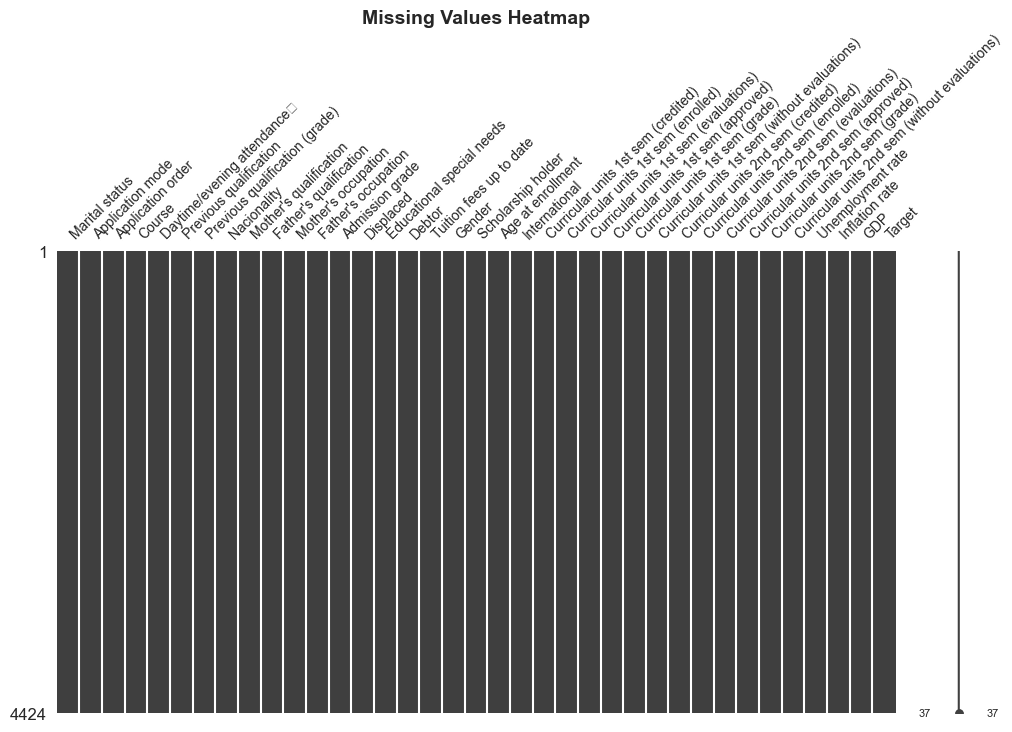


2. Target Variable Distribution


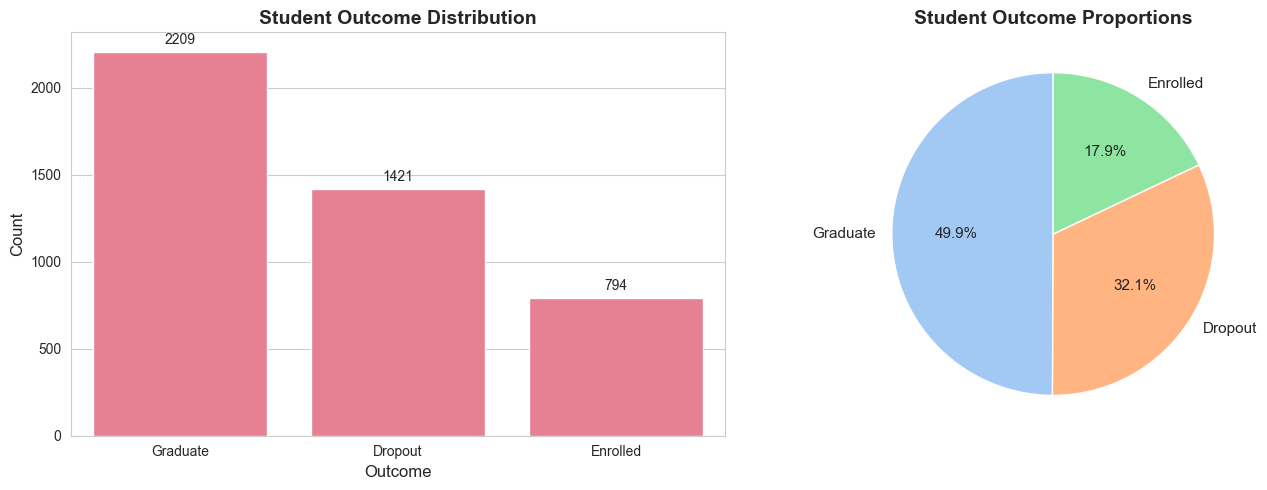


Class Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: count, dtype: float64


In [19]:
# Improved Data Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set style for better-looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# 1. Missing Values Visualization
print("1. Missing Values Analysis")
msno.matrix(df, figsize=(12, 6), fontsize=10)
plt.title("Missing Values Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Target Variable Distribution with percentages
print("\n2. Target Variable Distribution")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df['Target'].value_counts()
sns.countplot(data=df, x='Target', ax=ax[0], order=target_counts.index)
ax[0].set_title('Student Outcome Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Outcome', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Add value labels on bars
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', padding=3)

# Pie chart with percentages
colors = sns.color_palette('pastel')
ax[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
          startangle=90, colors=colors, textprops={'fontsize': 11})
ax[1].set_title('Student Outcome Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:\n{target_counts}\n{target_counts / len(df) * 100}")


3. Academic Performance by Student Outcome


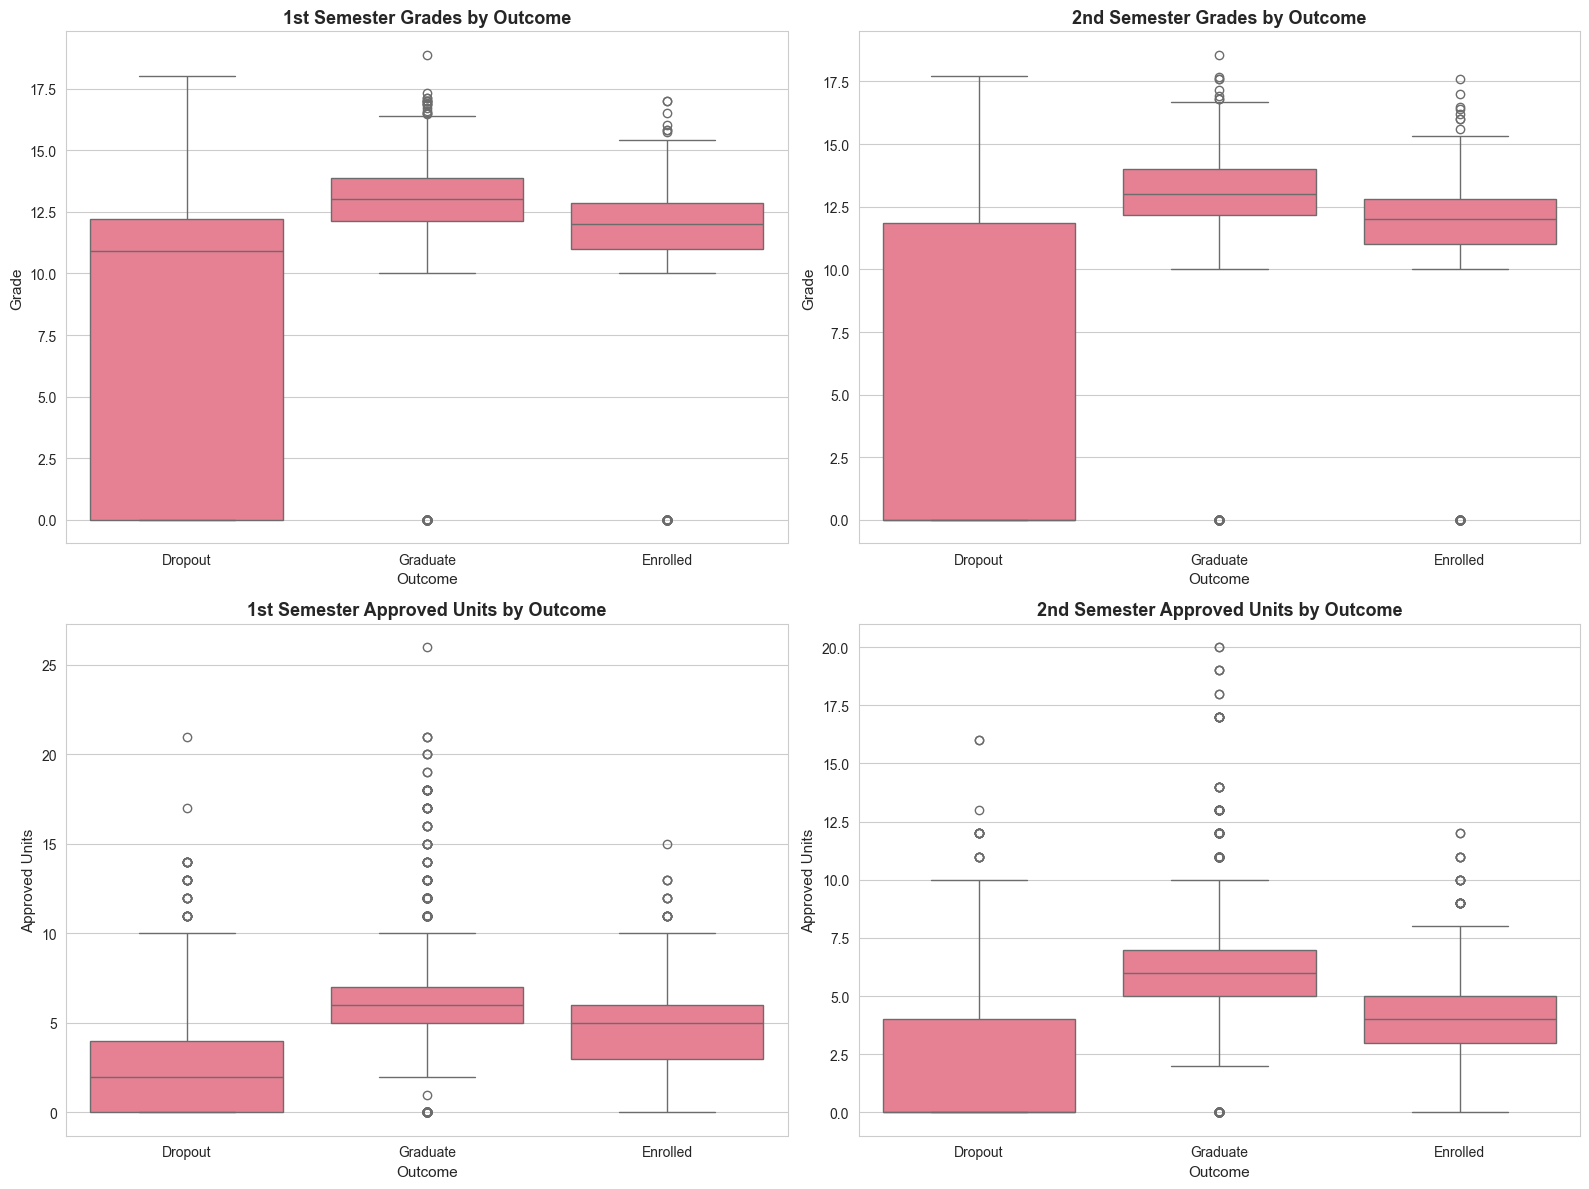

In [20]:
# 3. Academic Performance Analysis by Outcome
print("3. Academic Performance by Student Outcome")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# First semester grades
sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (grade)', ax=axes[0, 0])
axes[0, 0].set_title('1st Semester Grades by Outcome', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Outcome', fontsize=11)
axes[0, 0].set_ylabel('Grade', fontsize=11)

# Second semester grades
sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[0, 1])
axes[0, 1].set_title('2nd Semester Grades by Outcome', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Outcome', fontsize=11)
axes[0, 1].set_ylabel('Grade', fontsize=11)

# First semester approved units
sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (approved)', ax=axes[1, 0])
axes[1, 0].set_title('1st Semester Approved Units by Outcome', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Outcome', fontsize=11)
axes[1, 0].set_ylabel('Approved Units', fontsize=11)

# Second semester approved units
sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (approved)', ax=axes[1, 1])
axes[1, 1].set_title('2nd Semester Approved Units by Outcome', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Outcome', fontsize=11)
axes[1, 1].set_ylabel('Approved Units', fontsize=11)

plt.tight_layout()
plt.show()


4. Demographic Analysis


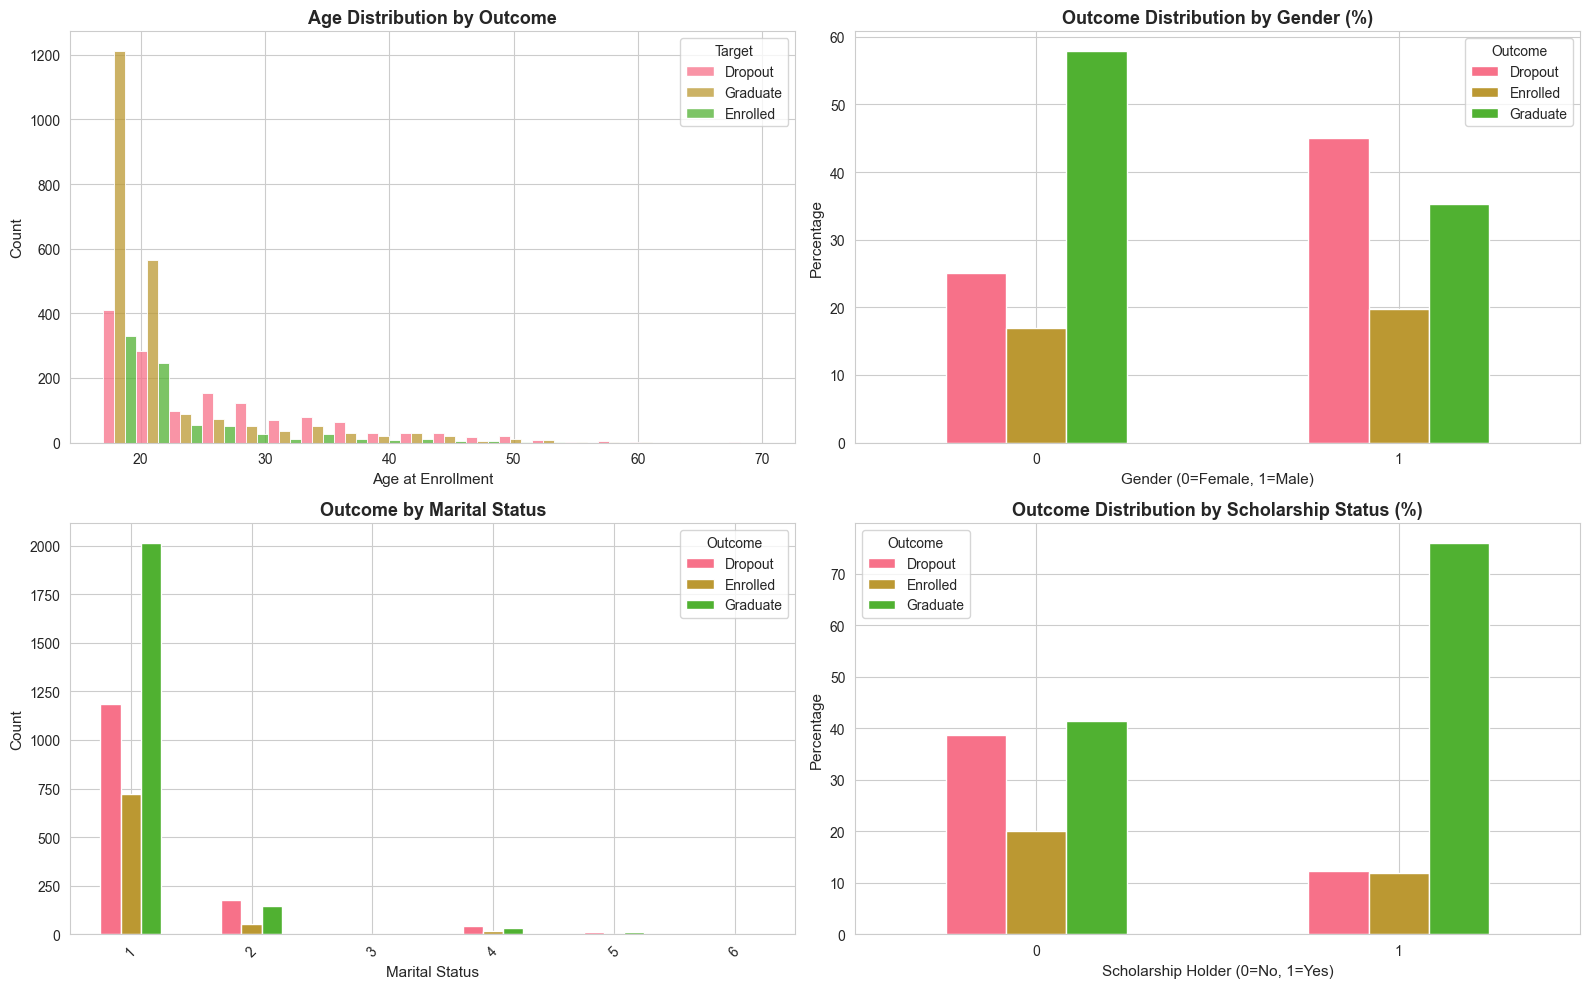

In [21]:
# 4. Demographic Analysis
print("4. Demographic Analysis")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Age distribution by outcome
sns.histplot(data=df, x='Age at enrollment', hue='Target', multiple='dodge', bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Outcome', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Age at Enrollment', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)

# Gender distribution
gender_target = pd.crosstab(df['Gender'], df['Target'], normalize='index') * 100
gender_target.plot(kind='bar', ax=axes[0, 1], rot=0)
axes[0, 1].set_title('Outcome Distribution by Gender (%)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Gender (0=Female, 1=Male)', fontsize=11)
axes[0, 1].set_ylabel('Percentage', fontsize=11)
axes[0, 1].legend(title='Outcome')

# Marital status distribution
marital_target = pd.crosstab(df['Marital status'], df['Target'])
marital_target.plot(kind='bar', ax=axes[1, 0], rot=45)
axes[1, 0].set_title('Outcome by Marital Status', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Marital Status', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].legend(title='Outcome')

# Scholarship holder impact
scholarship_target = pd.crosstab(df['Scholarship holder'], df['Target'], normalize='index') * 100
scholarship_target.plot(kind='bar', ax=axes[1, 1], rot=0)
axes[1, 1].set_title('Outcome Distribution by Scholarship Status (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Scholarship Holder (0=No, 1=Yes)', fontsize=11)
axes[1, 1].set_ylabel('Percentage', fontsize=11)
axes[1, 1].legend(title='Outcome')

plt.tight_layout()
plt.show()


5. Economic Factors Impact


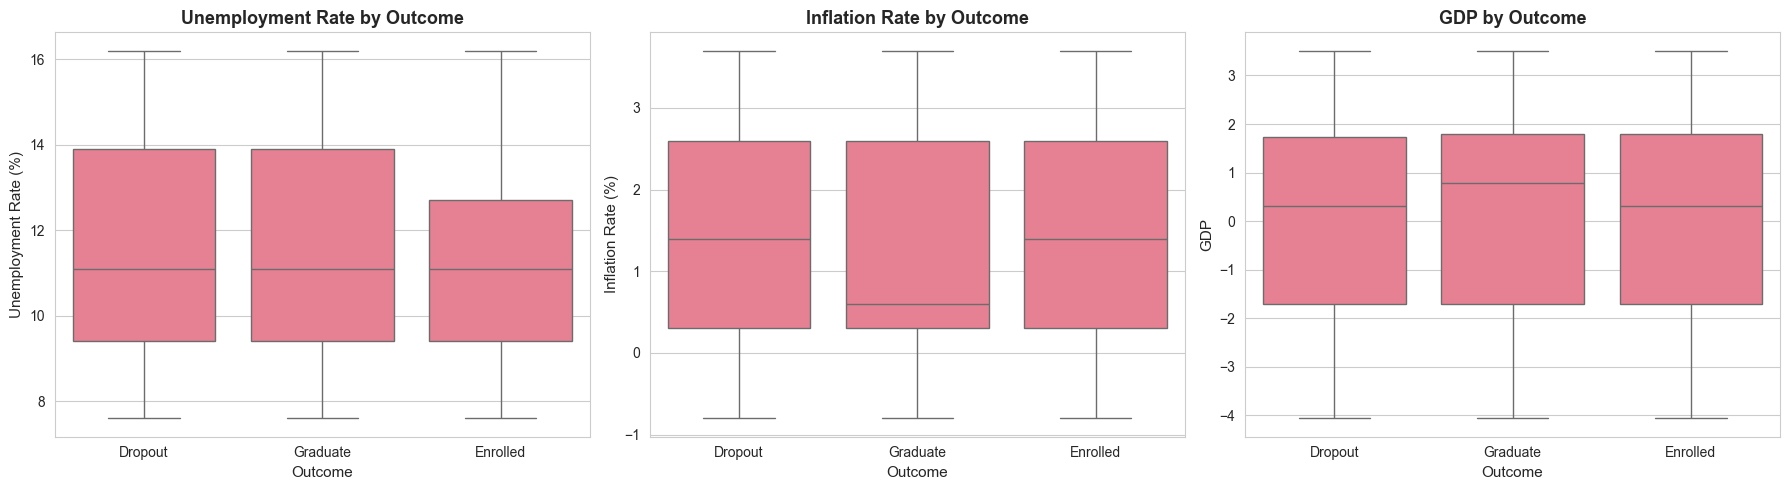

In [22]:
# 5. Economic Factors Analysis
print("5. Economic Factors Impact")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Unemployment rate
sns.boxplot(data=df, x='Target', y='Unemployment rate', ax=axes[0])
axes[0].set_title('Unemployment Rate by Outcome', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Outcome', fontsize=11)
axes[0].set_ylabel('Unemployment Rate (%)', fontsize=11)

# Inflation rate
sns.boxplot(data=df, x='Target', y='Inflation rate', ax=axes[1])
axes[1].set_title('Inflation Rate by Outcome', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Outcome', fontsize=11)
axes[1].set_ylabel('Inflation Rate (%)', fontsize=11)

# GDP
sns.boxplot(data=df, x='Target', y='GDP', ax=axes[2])
axes[2].set_title('GDP by Outcome', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Outcome', fontsize=11)
axes[2].set_ylabel('GDP', fontsize=11)

plt.tight_layout()
plt.show()


6. Correlation Analysis with Target Variable


/var/folders/xq/91qq8rgx7ps281h9ck6mkjfh0000gn/T/ipykernel_27842/3900531225.py:32: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/Users/bastianthomsen/Documents/programming/CodeCademy/ML_AI_Engineer/Portifolio_Project/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


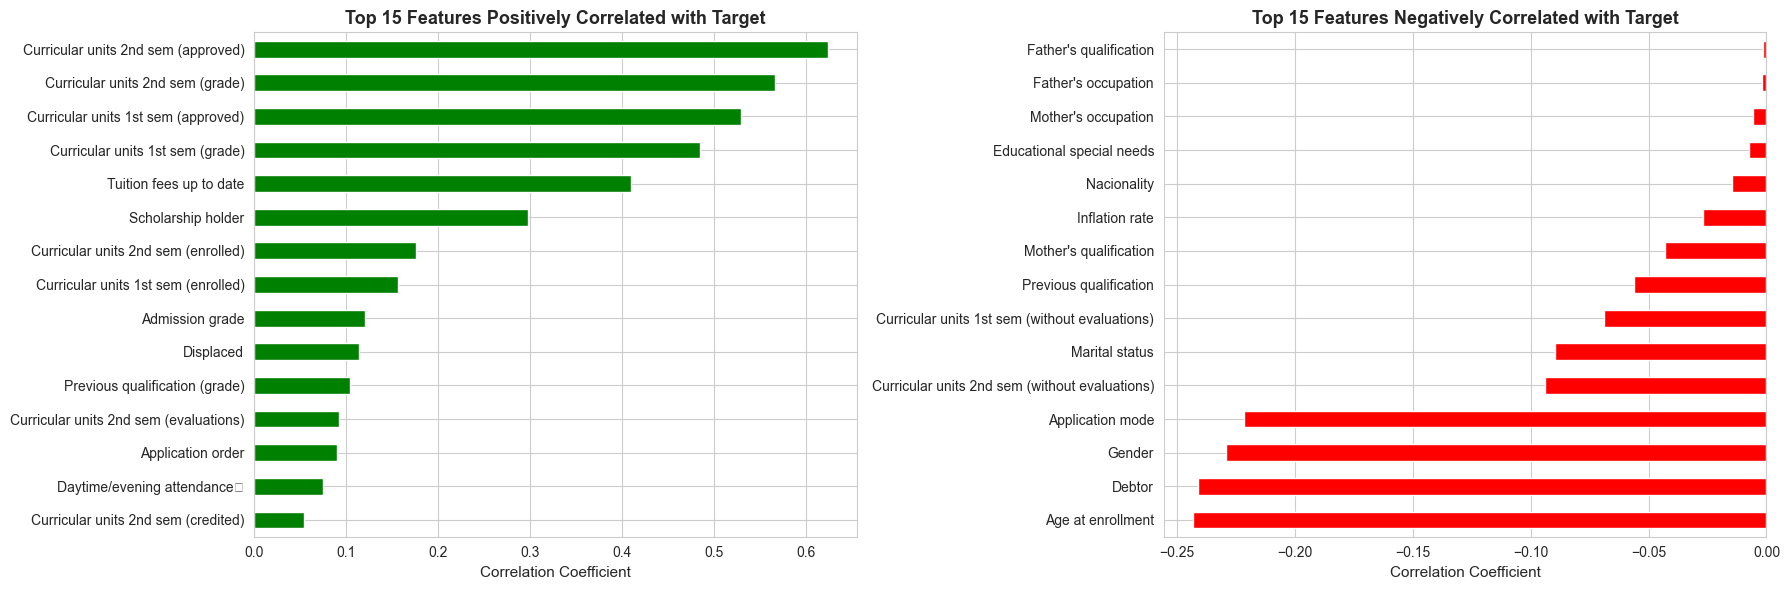


Top 10 Positive Correlations:
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 1st sem (enrolled)    0.155974
Admission grade                        0.120889
Displaced                              0.113986
dtype: float64

Top 10 Negative Correlations:
Inflation rate                                   -0.026874
Mother's qualification                           -0.043178
Previous qualification                           -0.056039
Curricular units 1st sem (without evaluations)   -0.068702
Marital status                                   -0.089804
Curricular units 2nd sem (without evaluations)   -0.094028
Application mode                                 -0.221747
Gender                        

In [23]:
# 6. Improved Correlation Analysis
print("6. Correlation Analysis with Target Variable")

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with target (encoded as numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_encoded = le.fit_transform(df['Target'])

# Get correlations with target
correlations = numeric_df.corrwith(pd.Series(target_encoded, index=numeric_df.index)).sort_values(ascending=False)

# Plot top correlations
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top positive correlations
top_positive = correlations.head(15)
top_positive.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Top 15 Features Positively Correlated with Target', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient', fontsize=11)
axes[0].invert_yaxis()

# Top negative correlations
top_negative = correlations.tail(15)
top_negative.plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title('Top 15 Features Negatively Correlated with Target', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Print top correlations
print("\nTop 10 Positive Correlations:")
print(correlations.head(10))
print("\nTop 10 Negative Correlations:")
print(correlations.tail(10))


7. Correlation Heatmap for Key Features


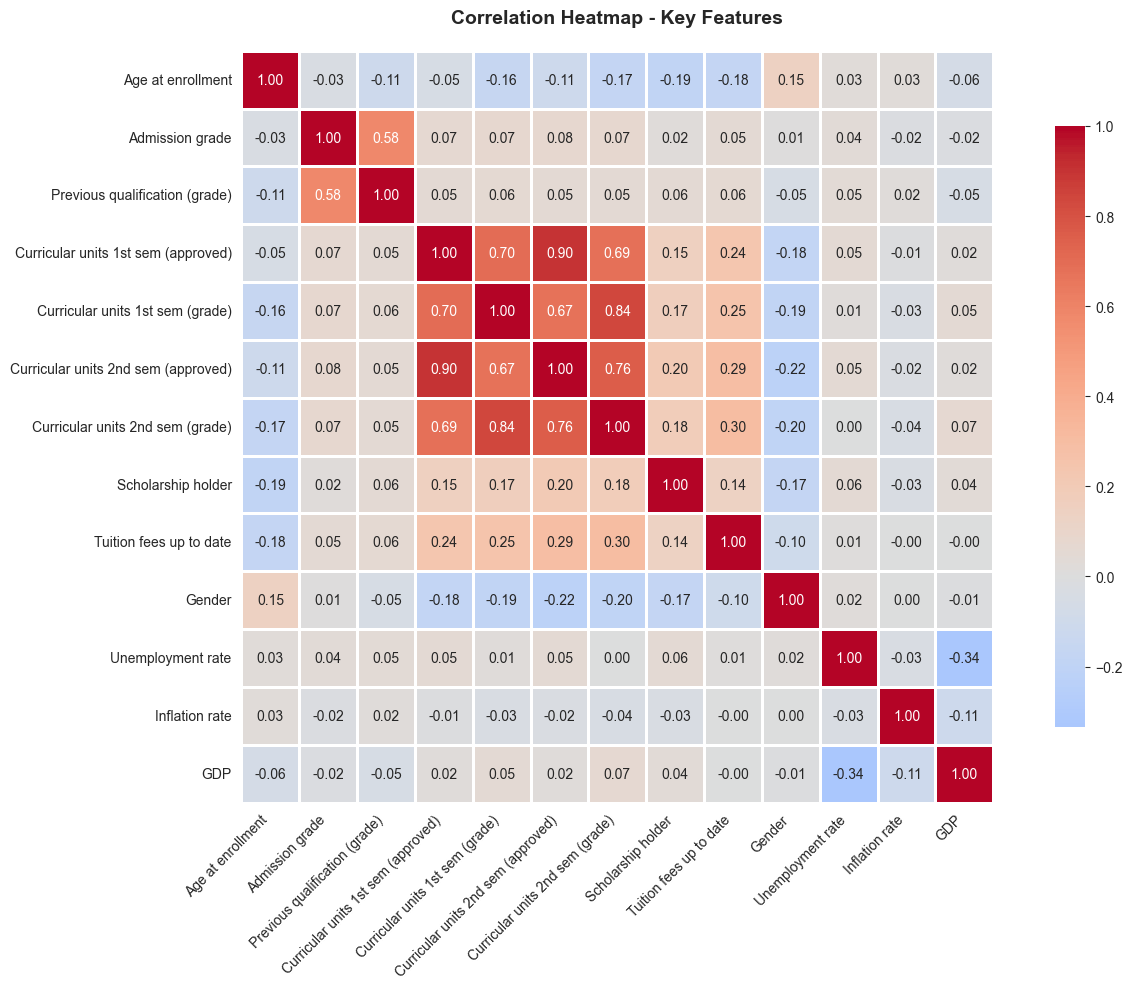

In [24]:
# 7. Key Features Correlation Heatmap
print("7. Correlation Heatmap for Key Features")

# Select key features for a focused heatmap
key_features = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Scholarship holder',
    'Tuition fees up to date',
    'Gender',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Create correlation matrix for key features
key_corr = df[key_features].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(key_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Key Features', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


8. Admission and Previous Qualification Analysis


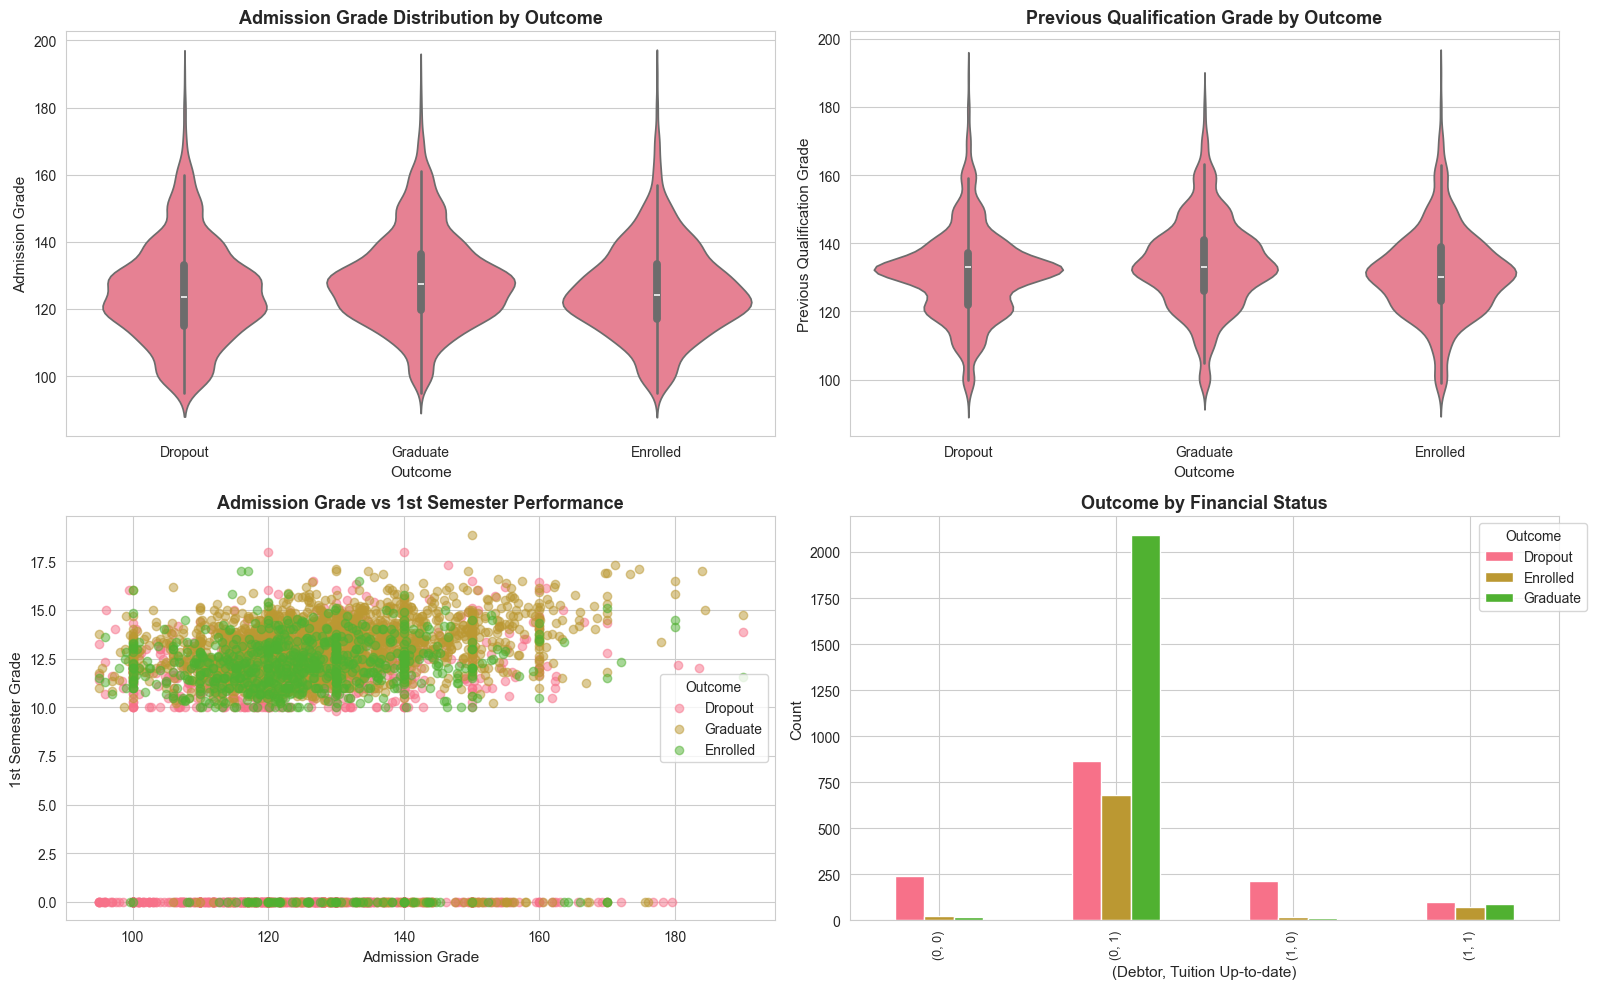

In [25]:
# 8. Admission and Qualification Analysis
print("8. Admission and Previous Qualification Analysis")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Admission grade by outcome
sns.violinplot(data=df, x='Target', y='Admission grade', ax=axes[0, 0])
axes[0, 0].set_title('Admission Grade Distribution by Outcome', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Outcome', fontsize=11)
axes[0, 0].set_ylabel('Admission Grade', fontsize=11)

# Previous qualification grade by outcome
sns.violinplot(data=df, x='Target', y='Previous qualification (grade)', ax=axes[0, 1])
axes[0, 1].set_title('Previous Qualification Grade by Outcome', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Outcome', fontsize=11)
axes[0, 1].set_ylabel('Previous Qualification Grade', fontsize=11)

# Scatter: Admission grade vs 1st semester grade, colored by outcome
for target in df['Target'].unique():
    subset = df[df['Target'] == target]
    axes[1, 0].scatter(subset['Admission grade'], 
                       subset['Curricular units 1st sem (grade)'], 
                       label=target, alpha=0.5)
axes[1, 0].set_title('Admission Grade vs 1st Semester Performance', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Admission Grade', fontsize=11)
axes[1, 0].set_ylabel('1st Semester Grade', fontsize=11)
axes[1, 0].legend(title='Outcome')

# Debtor and tuition status impact
debtor_tuition = pd.crosstab([df['Debtor'], df['Tuition fees up to date']], df['Target'])
debtor_tuition.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Outcome by Financial Status', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('(Debtor, Tuition Up-to-date)', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].legend(title='Outcome', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', labelsize=9)

plt.tight_layout()
plt.show()
